In [1]:
setwd("/Volumes/Disk/Projects/StrokeCare/ GSE16561/data")

In [3]:
R.home()

[1] "/opt/anaconda3/envs/r_env/lib/R"

In [4]:
deg <- read.csv("DEG_results.csv", row.names = 1)

In [5]:
head(deg)

,logFC,AveExpr,t,P.Value,adj.P.Val,B
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
LAMP2,0.7323440,11.828877,10.528544,1.587175e-15,2.931511e-11,24.86935
PLXDC2,0.7485630,9.676291,10.004249,1.212865e-14,1.120081e-10,22.92274
NPEPPS,0.4525563,10.225527,9.718325,3.718416e-14,2.170215e-10,21.84859
ANTXR2,0.7071000,11.032350,9.658775,4.699979e-14,2.170215e-10,21.62383
ST8SIA4,0.5722978,9.100251,9.380470,1.410238e-13,5.209419e-10,20.56901
PPIH,-0.5203180,9.611126,-9.277234,2.123207e-13,6.535940e-10,20.17596


In [6]:
# 유의미 DEG 필터링: 통계적 + 생물학적 기준
deg_strong <- subset(deg, adj.P.Val < 0.05 & abs(logFC) > 1)
gene_symbols <- rownames(deg_strong)

In [7]:
library(org.Hs.eg.db)

entrez_ids <- mapIds(org.Hs.eg.db,
                     keys = gene_symbols,
                     column = "ENTREZID",
                     keytype = "SYMBOL",
                     multiVals = "first")

entrez_ids <- na.omit(entrez_ids)

'select()' returned 1:1 mapping between keys and columns



In [8]:
entrez_df <- data.frame(
  Symbol = names(entrez_ids),
  EntrezID = as.vector(entrez_ids)
)

print(entrez_df)

     Symbol EntrezID
1       CD6      923
2      ARG1      383
3       MAL     4118
4      IL7R     3575
5      CCR7     1236
6      MMP9     4318
7   S100A12     6283
8      ORM1     5004
9  APOBEC3A   200315
10   FCGR3B     2215


In [9]:
library(clusterProfiler)
# BP: Biological Process 분석
ego_bp <- enrichGO(gene = entrez_ids,
                   OrgDb = org.Hs.eg.db,
                   ont = "BP",
                   pAdjustMethod = "BH",
                   pvalueCutoff = 0.05,
                   readable = TRUE)



Registered S3 methods overwritten by 'treeio':
  method              from    
  MRCA.phylo          tidytree
  MRCA.treedata       tidytree
  Nnode.treedata      tidytree
  Ntip.treedata       tidytree
  ancestor.phylo      tidytree
  ancestor.treedata   tidytree
  child.phylo         tidytree
  child.treedata      tidytree
  full_join.phylo     tidytree
  full_join.treedata  tidytree
  groupClade.phylo    tidytree
  groupClade.treedata tidytree
  groupOTU.phylo      tidytree
  groupOTU.treedata   tidytree
  is.rooted.treedata  tidytree
  nodeid.phylo        tidytree
  nodeid.treedata     tidytree
  nodelab.phylo       tidytree
  nodelab.treedata    tidytree
  offspring.phylo     tidytree
  offspring.treedata  tidytree
  parent.phylo        tidytree
  parent.treedata     tidytree
  root.treedata       tidytree
  rootnode.phylo      tidytree
  sibling.phylo       tidytree

clusterProfiler v4.6.0  For help: https://yulab-smu.top/biomedical-knowledge-mining-book/

If you use clusterProf

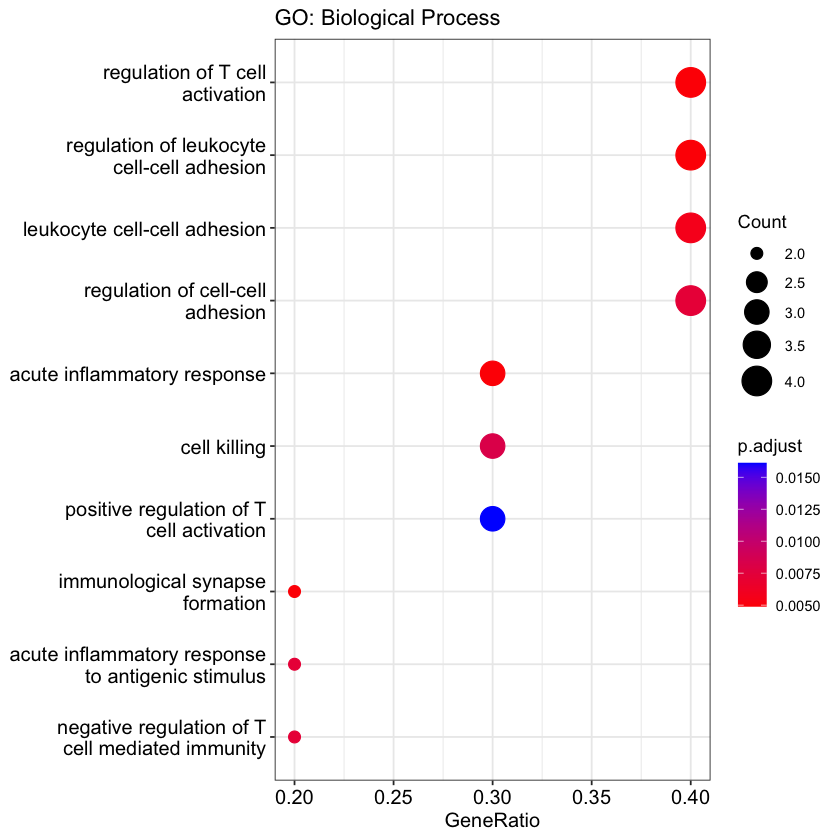

In [25]:
library(enrichplot)
dotplot(ego_bp, showCategory = 10, title = "GO: Biological Process")

In [10]:
# MF: Molecular Function 분석
ego_mf <- enrichGO(gene = entrez_ids,
                   OrgDb = org.Hs.eg.db,
                   ont = "MF",
                   pAdjustMethod = "BH",
                   pvalueCutoff = 0.05,
                   readable = TRUE)

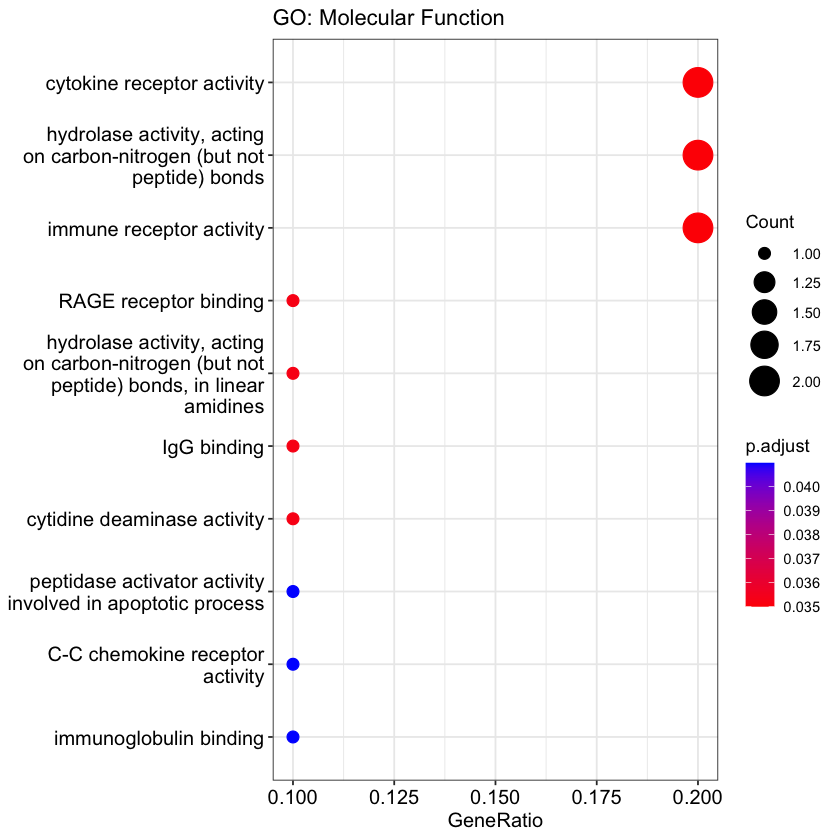

In [27]:
dotplot(ego_mf, showCategory = 10, title = "GO: Molecular Function")

In [11]:
# CC: Cellular Component 분석
ego_cc <- enrichGO(gene = entrez_ids,
                   OrgDb = org.Hs.eg.db,
                   ont = "CC",
                   pAdjustMethod = "BH",
                   pvalueCutoff = 0.05,
                   readable = TRUE)

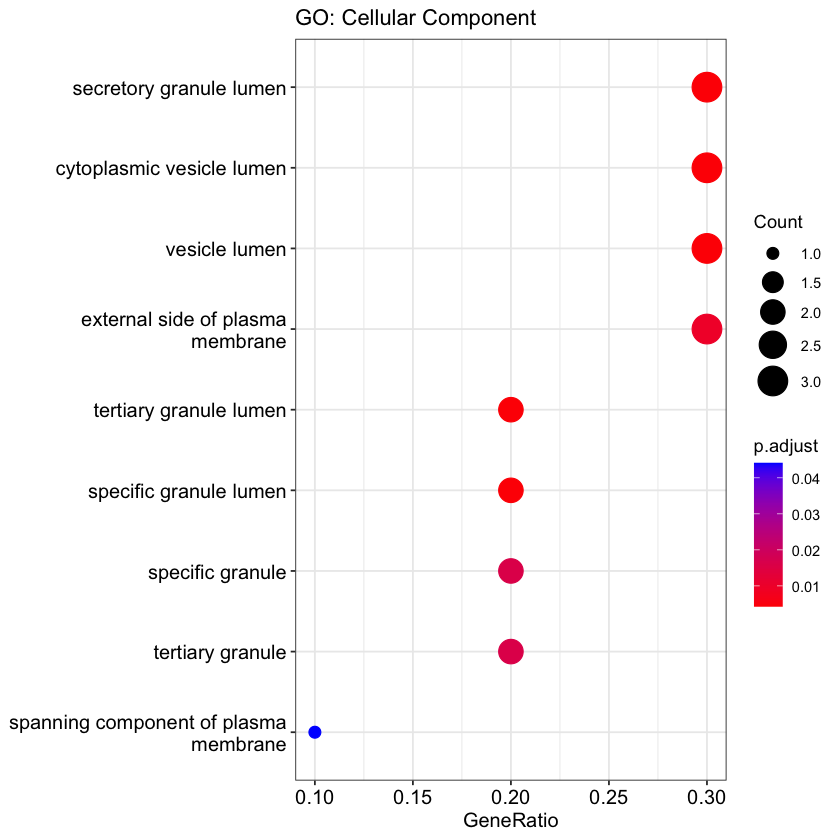

In [29]:
dotplot(ego_cc, showCategory = 10, title = "GO: Cellular Component")

In [30]:
# enrichKEGG()는 EntrezID만 받음
entrez_ids_char <- as.character(entrez_ids)

In [35]:
ekegg <- enrichKEGG(gene = entrez_ids_char,
                    organism = 'hsa',             # 인간
                    pAdjustMethod = "BH",
                    pvalueCutoff = 0.05)

--> No gene can be mapped....

--> Expected input gene ID: 

--> return NULL...



In [36]:
ekegg


NULL

In [19]:
# Kegg 
gene_list <- deg$logFC
names(gene_list) <- rownames(deg)

In [20]:
library(org.Hs.eg.db)

gene_list_entrez <- mapIds(org.Hs.eg.db,
                           keys = names(gene_list),
                           column = "ENTREZID",
                           keytype = "SYMBOL",
                           multiVals = "first")

# 이름 바꾸고 NA 제거
names(gene_list) <- as.character(gene_list_entrez)
gene_list <- na.omit(gene_list)

'select()' returned 1:many mapping between keys and columns



In [21]:
gene_list <- sort(gene_list, decreasing = TRUE)

In [22]:
head(names(gene_list))  # 이거 실행해봐

[1] "383"    "4318"   "200315" "5004"   "6283"   "2215"

In [23]:
gsea_kegg <- gseKEGG(geneList = gene_list,
                     organism = "hsa",
                     pvalueCutoff = 0.25,
                     verbose = FALSE)
# 아마 연결된 유전자가 너무 작아서(10개) Kegg pathway 분석 진행이 불가

--> Expected input gene ID: 



ERROR: Error in check_gene_id(geneList, geneSets): --> No gene can be mapped....


Warning message in fgseaMultilevel(pathways = pathways, stats = stats, minSize = minSize, :
“For some pathways, in reality P-values are less than 1e-10. You can set the `eps` argument to zero for better estimation.”


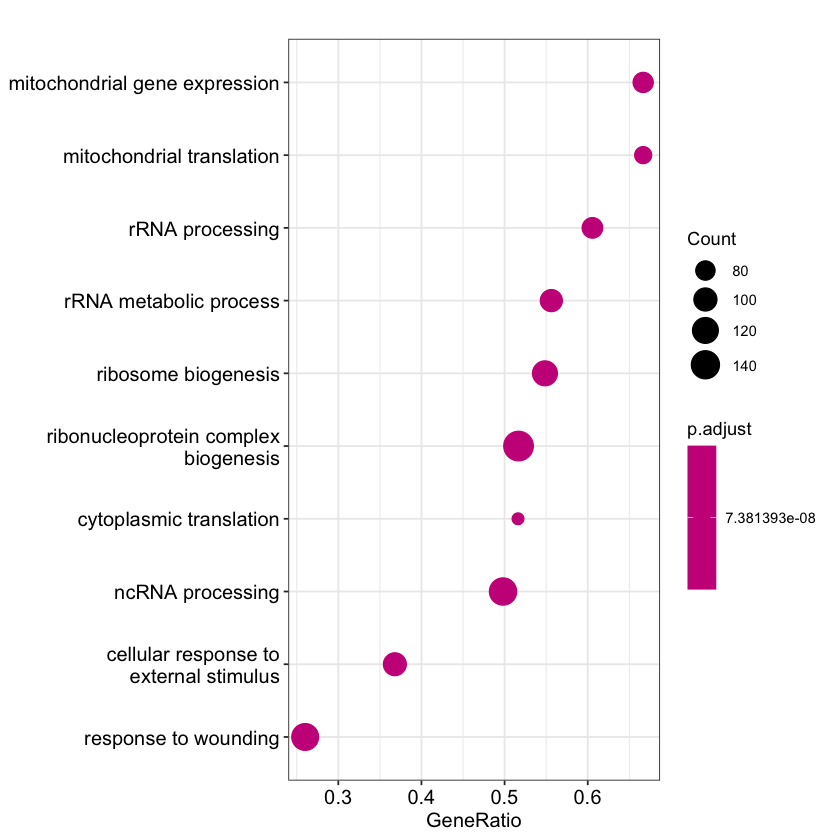

In [25]:
# GSEA
# 기존 gene_list에서 중복 제거
gene_list <- sort(gene_list, decreasing = TRUE)
gene_list <- gene_list[!duplicated(names(gene_list))]

# GSEA 실행 (gseKEGG or fgsea 등)
gsea_go <- gseGO(geneList = gene_list,
                 OrgDb = org.Hs.eg.db,
                 ont = "BP",
                 keyType = "ENTREZID",
                 pvalueCutoff = 0.25,
                 verbose = FALSE)

dotplot(gsea_go, showCategory = 10)

In [26]:
biomarker_candidates <- subset(deg, abs(logFC) > 1.5 & adj.P.Val < 0.01)

In [27]:
biomarker_candidates

,logFC,AveExpr,t,P.Value,adj.P.Val,B
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ARG1,1.631567,9.464094,7.107134,1.290972e-09,1.90754e-07,11.78621


In [ ]:
# 1. DEG 결과 불러오기
deg <- read.csv("DEG_results.csv", row.names = 1)

# 2. ARG1 추출
arg1_expr <- deg["ARG1", "AveExpr"]  # log2 normalized expression 평균값

# 3. pheno 데이터 불러오기 (sample ID + 그룹 정보 포함)
pheno <- read.csv("pheno.csv", row.names = 1)  # Group 컬럼 필요: Stroke / Control

# 4. expr_filtered 불러오기 (행: gene, 열: 샘플)
expr_filtered <- read.csv("expr_filtered.csv", row.names = 1)

# 5. ARG1의 샘플별 발현값 추출
arg1_vector <- as.numeric(expr_filtered["ARG1", ])
names(arg1_vector) <- colnames(expr_filtered)

# 6. 데이터프레임 생성
df <- data.frame(
  Sample = names(arg1_vector),
  ARG1_log2 = arg1_vector,
  Group = pheno[names(arg1_vector), "Group"]
)

# 7. 저장
write.csv(df, "arg1_ml_dataset.csv", row.names = FALSE)